<a href="https://colab.research.google.com/github/ebinjomonkottakal/DeepLearningProjects/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten


In [ ]:
dataset_url = "http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin = dataset_url,cache_dir = '/content',untar = True)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/datasets/flower_photos/roses/2053476785_c162a3e358.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5892908233_6756199a43.jpg')]

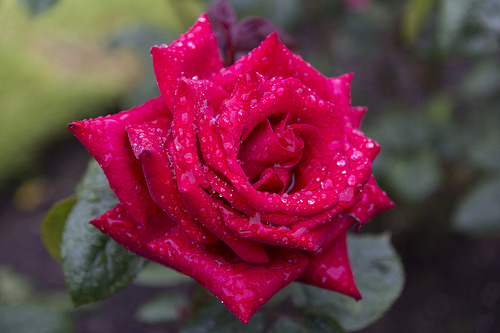

In [ ]:
PIL.Image.open(str(roses[400]))

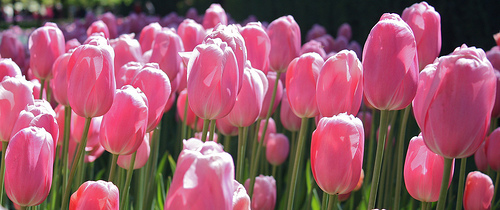

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[400]))

In [ ]:
flower_img_dic = {
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'dandelion':list(data_dir.glob('dandelion/*'))
}

In [ ]:
flower_label_dic = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
img = cv2.imread(str(flower_img_dic['roses'][3]))
img.shape

(240, 240, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(100, 100, 3)

In [ ]:
x,y = [],[]
for flower_name ,images in flower_img_dic.items():
  for image in images:
    image = cv2.imread(str(image))
    image = cv2.resize(image,(180,180))
    x.append(image)
    y.append(flower_label_dic[flower_name])

In [ ]:
x  = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.2,random_state=0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5
from tensorflow.python.ops.math_ops import mod_eager_fallback
model = Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes))
model.compile(optimizer = 'adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,Y_train,epochs = 10)

Epoch 1/10
92/92 [==============================] - 2s 23ms/step - loss: 0.0518 - accuracy: 0.9857
Epoch 2/10
92/92 [==============================] - 2s 24ms/step - loss: 0.0379 - accuracy: 0.9905
Epoch 3/10
92/92 [==============================] - 2s 23ms/step - loss: 0.0169 - accuracy: 0.9963
Epoch 4/10
92/92 [==============================] - 2s 22ms/step - loss: 0.0247 - accuracy: 0.9939
Epoch 5/10
92/92 [==============================] - 2s 22ms/step - loss: 0.0715 - accuracy: 0.9748
Epoch 6/10
92/92 [==============================] - 2s 21ms/step - loss: 0.0566 - accuracy: 0.9823
Epoch 7/10
92/92 [==============================] - 2s 22ms/step - loss: 0.0238 - accuracy: 0.9949
Epoch 8/10
92/92 [==============================] - 2s 23ms/step - loss: 0.0094 - accuracy: 0.9983
Epoch 9/10
92/92 [==============================] - 2s 24ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 10/10
92/92 [==============================] - 2s 22ms/step - loss: 0.0046 - accuracy: 0.9993


In [ ]:
model.evaluate(X_test_scaled,Y_test)

23/23 [==============================] - 1s 19ms/step - loss: 3.3055 - accuracy: 0.6035


[3.3055267333984375, 0.6035422086715698]